Confusion Matrix:
 [[991  73]
 [ 60 395]]
Accuracy: 0.912
Precision: 0.844
Recall (Sensitivity): 0.868
Specificity: 0.931
AUC Score: 0.967


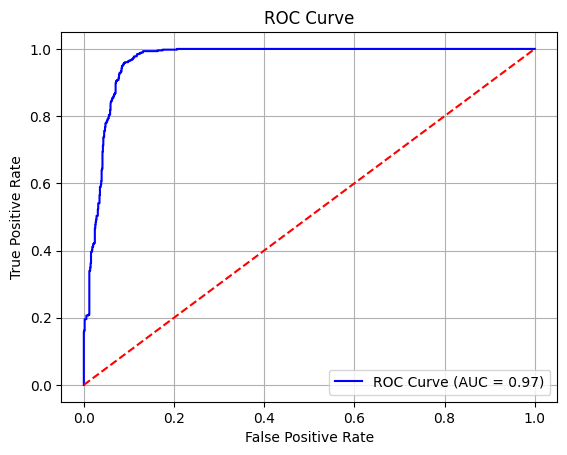

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_csv('Autism_Screening_Data_Combined.csv', engine='python')
X = df.drop("Class", axis=1)
y = df["Class"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

categorical_cols = ['Sex', 'Jauundice', 'Family_ASD']
X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[['Age']] = scaler.fit_transform(X_train[['Age']])
X_test[['Age']] = scaler.transform(X_test[['Age']])


from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0, probability=True)
classifier.fit(X_train, y_train)



from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, auc

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", round(acc, 3))

# Precision
prec = precision_score(y_test, y_pred, pos_label='YES')
print("Precision:", round(prec, 3))

# Recall (Sensitivity)
rec = recall_score(y_test, y_pred, pos_label='YES')
print("Recall (Sensitivity):", round(rec, 3))

# Specificity = TN / (TN + FP)
tn, fp, fn, tp = cm.ravel()
spec = tn / (tn + fp)
print("Specificity:", round(spec, 3))

# ROC Curve
y_prob = classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label='YES')

# AUC Score
roc_auc = auc(fpr, tpr)
print("AUC Score:", round(roc_auc, 3))

# Plot ROC Curve
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()